# Olympic exploratory data analysis
# Conclusions at the bottom 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
# Load Dataset

athletes = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
# Joining the 2 datasets

athletes_df = athletes.merge(regions , how = 'left' , on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
athletes_df.shape

(271116, 17)

In [7]:
# column names consistents

athletes_df.rename(columns={'region':'Region','notes':'Notes'}, inplace = True)

In [8]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [10]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [11]:
# Check Null value 
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [12]:
# To make a list of the missing columns

columns_with_missing_values = athletes_df.columns[athletes_df.isnull().any()].tolist()
columns_with_missing_values

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [13]:
# Bangladesh Details

athletes_df.query("Team =='Bangladesh'").head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
1055,590,Mohamed Abu Abdullah,M,27.0,173.0,74.0,Bangladesh,BAN,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,NaN,Bangladesh,NaN
2519,1421,Masbah Ahmmed,M,21.0,NaN,NaN,Bangladesh,BAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,NaN,Bangladesh,NaN
2981,1661,Doli Akhtar,F,14.0,158.0,53.0,Bangladesh,BAN,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 100 metres Breaststroke,NaN,Bangladesh,NaN
2982,1661,Doli Akhtar,F,18.0,158.0,53.0,Bangladesh,BAN,2004 Summer,2004,Summer,Athina,Swimming,Swimming Women's 50 metres Freestyle,NaN,Bangladesh,NaN
2983,1661,Doli Akhtar,F,22.0,158.0,53.0,Bangladesh,BAN,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Women's 50 metres Freestyle,NaN,Bangladesh,NaN


In [14]:
# Japan Details

athletes_df.query("Team =='Japan'").head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [15]:
# Top 10 countries participating

top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: count, dtype: int64

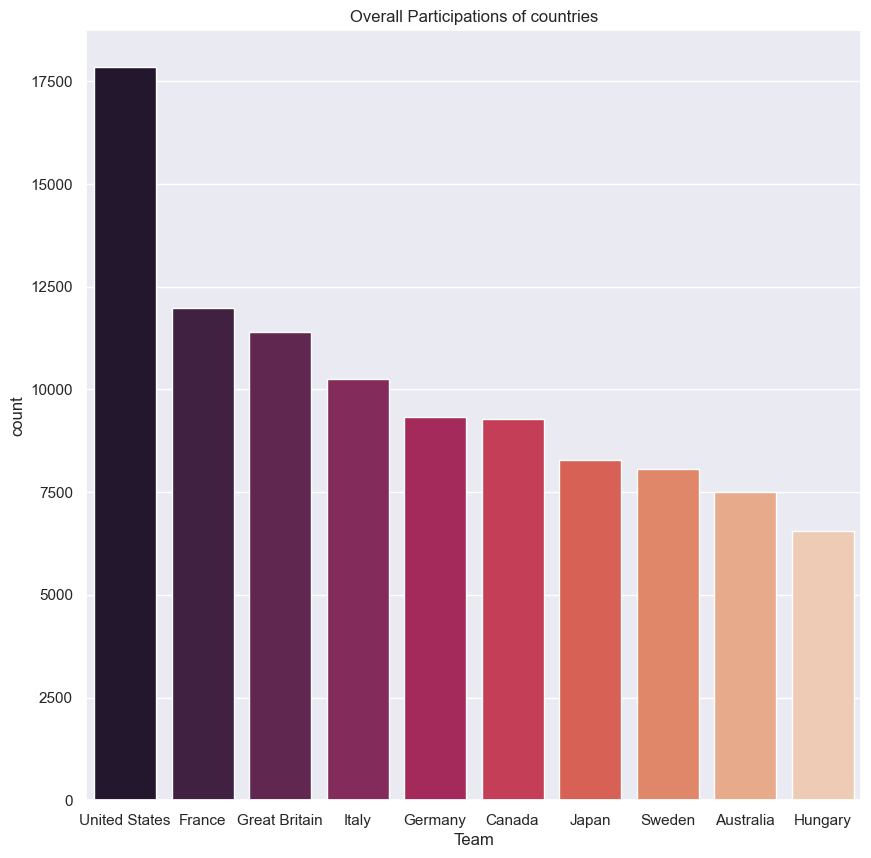

In [269]:
# Plot for the top 10 cotop_10_countries

plt.figure(figsize=(10,10))

plt.title("Overall Participations of countries")
sns.barplot (hue=top_10_countries.index ,x=top_10_countries.index, y=top_10_countries, palette="rocket",legend=False)
plt.show()

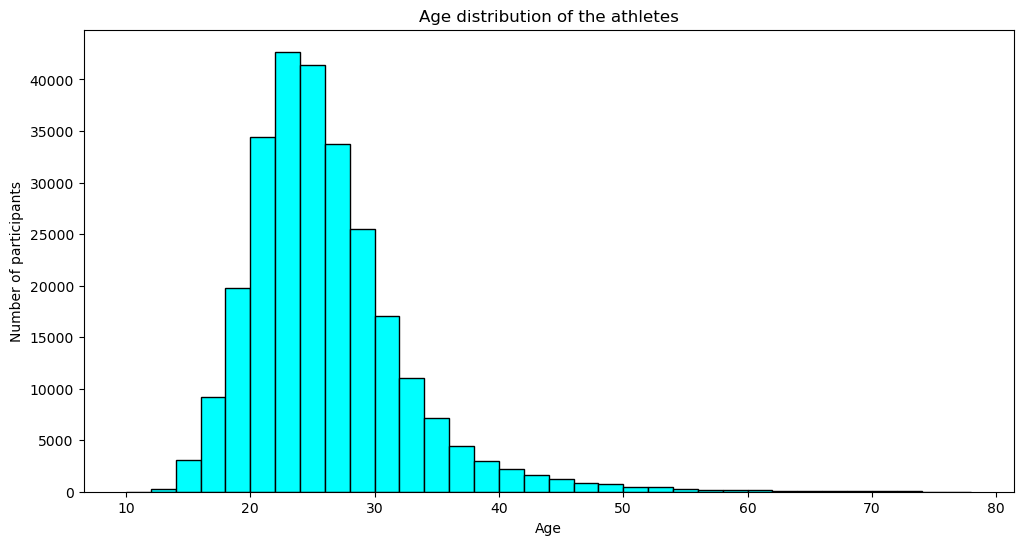

In [20]:
# Age distribution of the participants
plt.figure(figsize=(12,6))
plt.title("Age distribution of the athletes")
plt.xlabel("Age")
plt.ylabel("Number of participants")
plt.hist(athletes_df.Age ,bins = np.arange(10,80,2) , color="cyan", edgecolor="black")
plt.show()


In [21]:
# Different winter sports held during winter olympics

winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [22]:
# Different summer sports held during summer olympics

summer_sports = athletes_df[athletes_df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [24]:
# Male and Female participants

gender_counts=  athletes_df.Sex.value_counts()
gender_counts

Sex
M    196594
F     74522
Name: count, dtype: int64

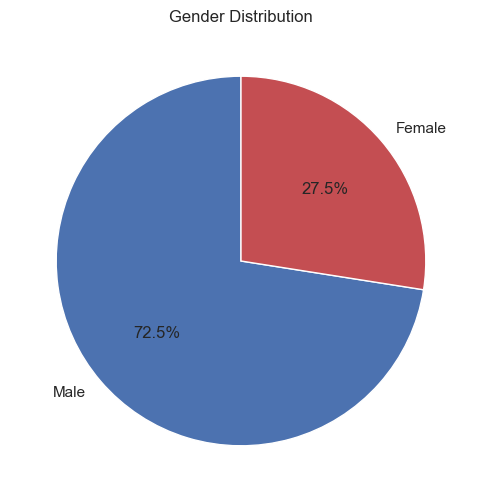

In [179]:
# Pie chart for male and female participantsabs

plt.figure(figsize=(12,6))
plt.title("Gender Distribution")
plt.pie(gender_counts, labels=['Male','Female'],autopct='%1.1f%%',startangle=90,colors='bright')
plt.show()

In [31]:
# Total Medals that the athletes had won 

athletes_df.Medal.value_counts()

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

In [63]:
# Total number of female participants in each olympics

female_participants = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')][['Year','Sex']]
female_participants = female_participants.groupby('Year').count()
female_participants.rename(columns={'Sex':'Number of females'},inplace=True)
female_participants.tail()

,Number of females
Year,
2000,5431
2004,5546
2008,5816
2012,5815
2016,6223


In [261]:
women=athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')]

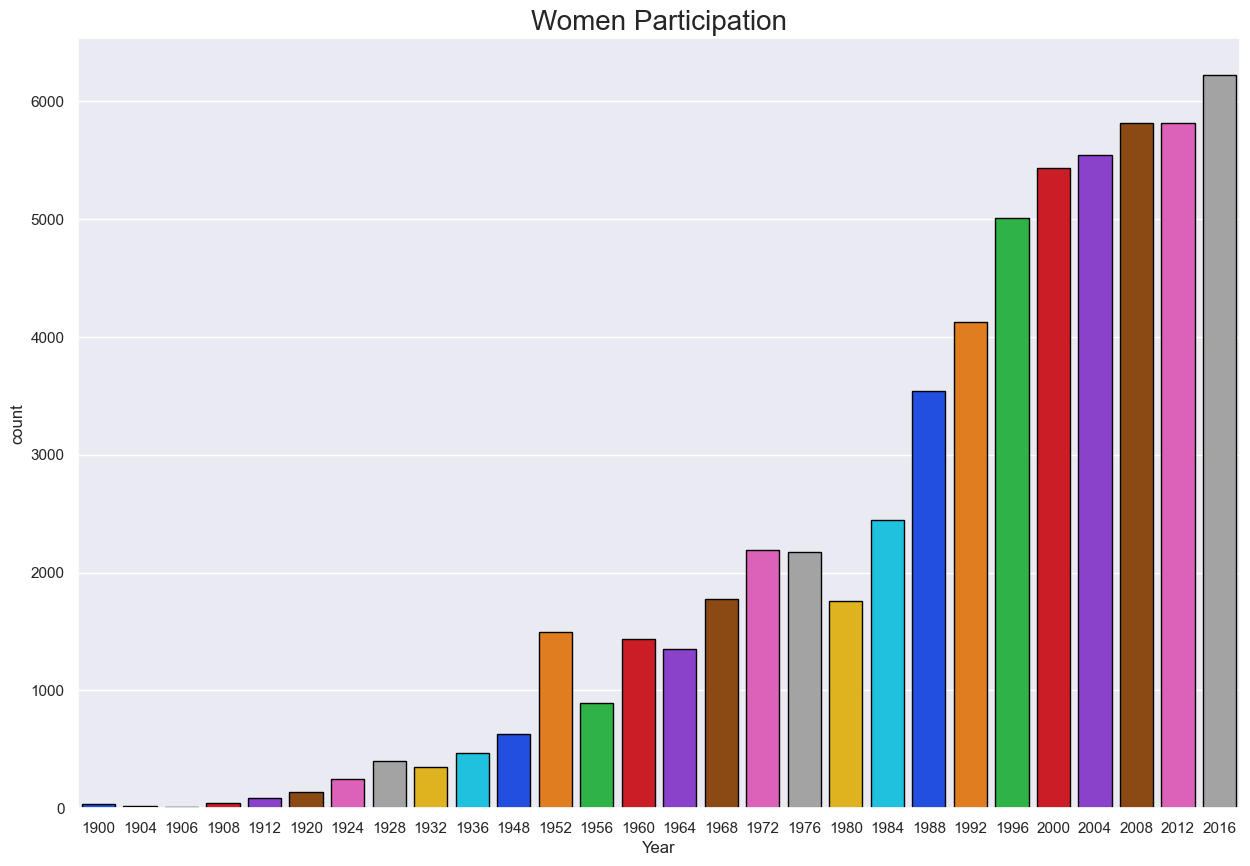

In [169]:

sns.set(style='darkgrid')

plt.figure(figsize=(15,10))
sns.countplot(x='Year',hue='Year',  data= women,edgecolor='black',palette='bright',legend=False)
plt.title('Women Participation',fontsize=20)
plt.show()

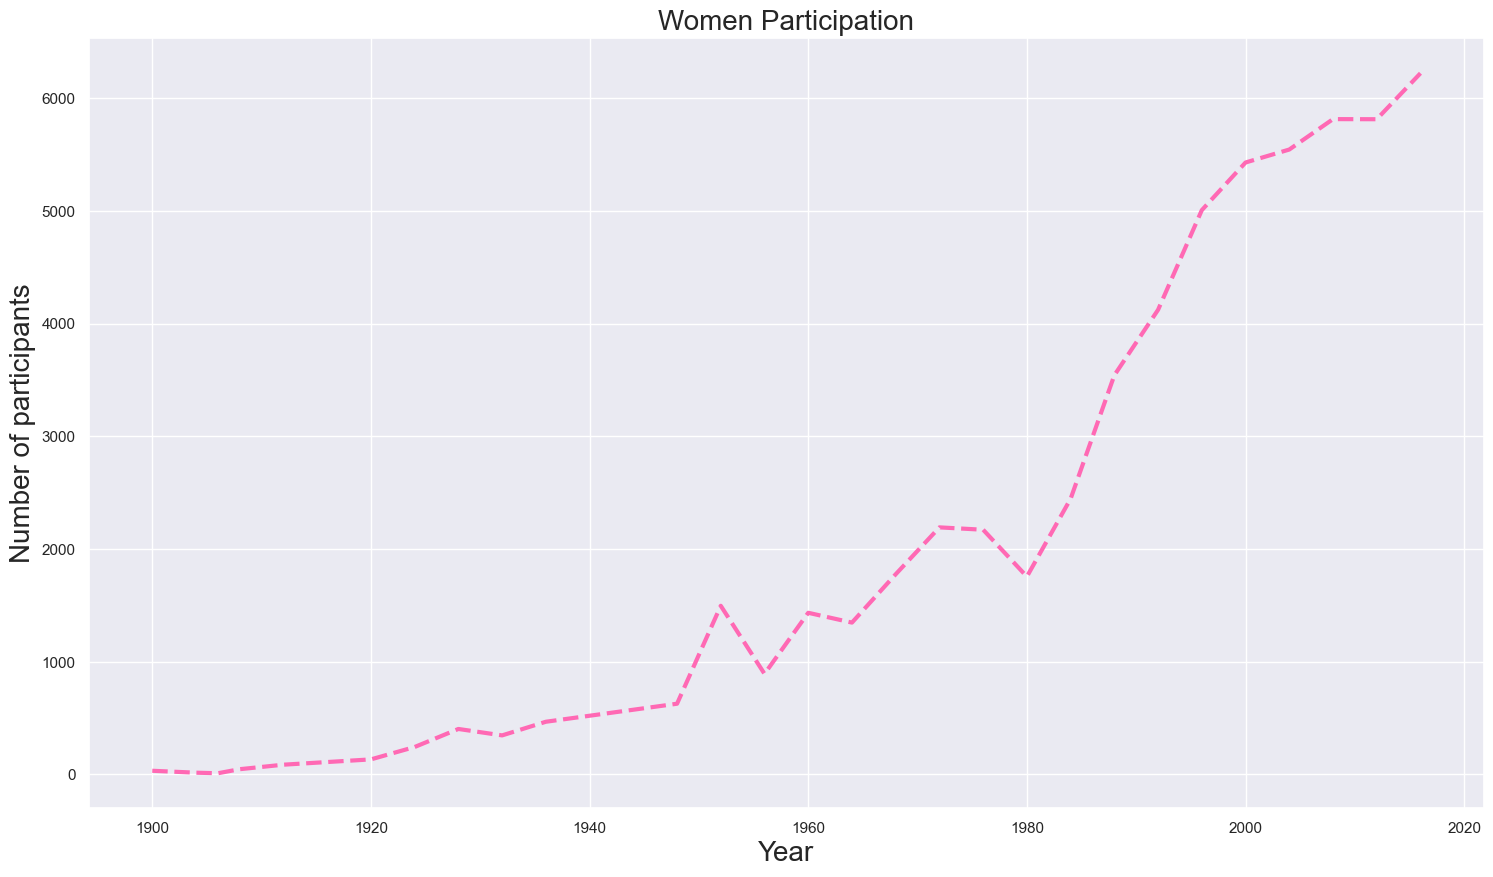

In [95]:
plt.figure(figsize=(18,10))
plt.plot(female_participants.index,female_participants,c='Hotpink',linewidth=3, linestyle = 'dashed')
plt.title('Women Participation',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of participants",fontsize=20)
plt.show()

In [262]:
# Total number of male participants in  olympics

male_participants = athletes_df[(athletes_df.Sex=='M') & (athletes_df.Season=='Summer')][['Year','Sex']]
male_participants = male_participants.groupby('Year').count()
male_participants.rename(columns={'Sex':'Number of males'},inplace=True)
male_participants.tail()

,Number of males
Year,
2000,8390
2004,7897
2008,7786
2012,7105
2016,7465


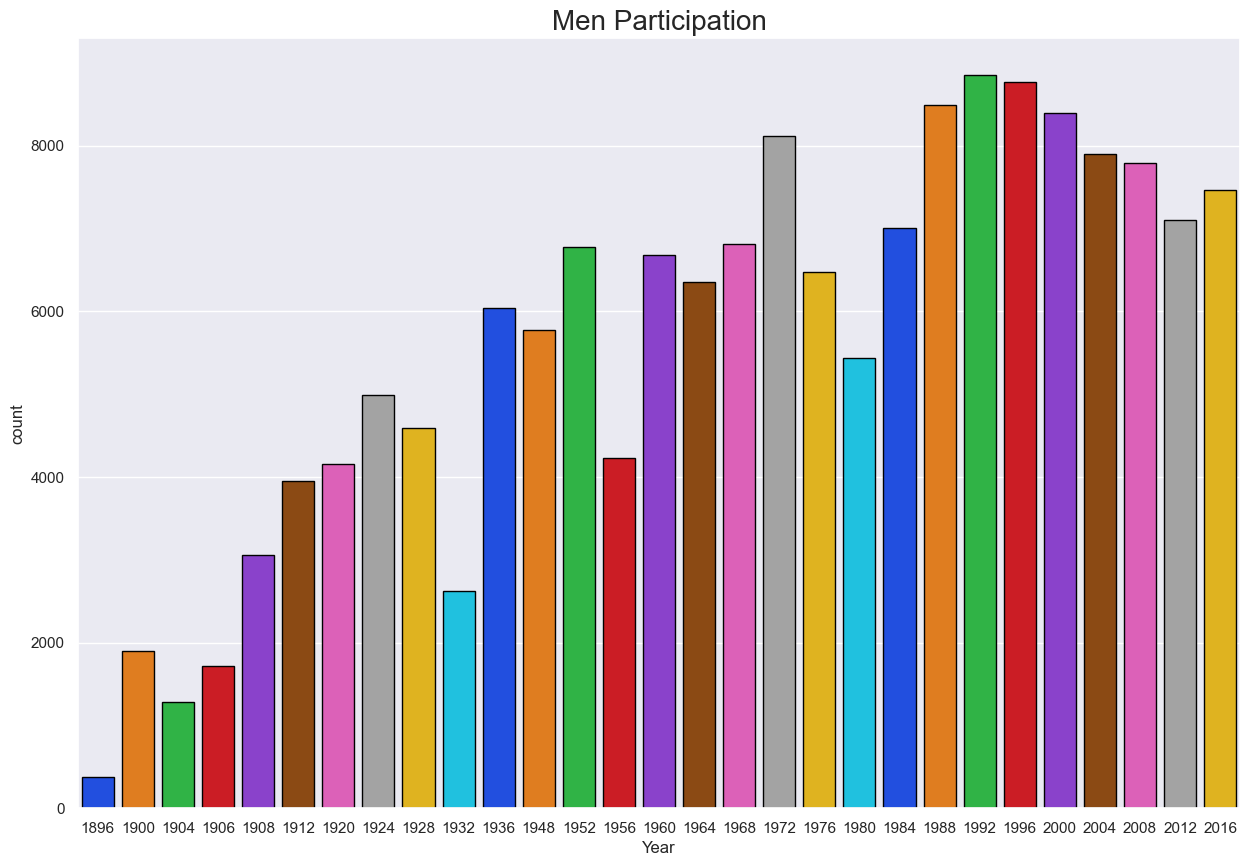

In [263]:
men=athletes_df[(athletes_df.Sex=='M') & (athletes_df.Season=='Summer')]
sns.set(style='darkgrid')

plt.figure(figsize=(15,10))
sns.countplot(x='Year',hue='Year',  data= men,edgecolor='black',palette='bright',legend=False)
plt.title('Men Participation',fontsize=20)
plt.show()

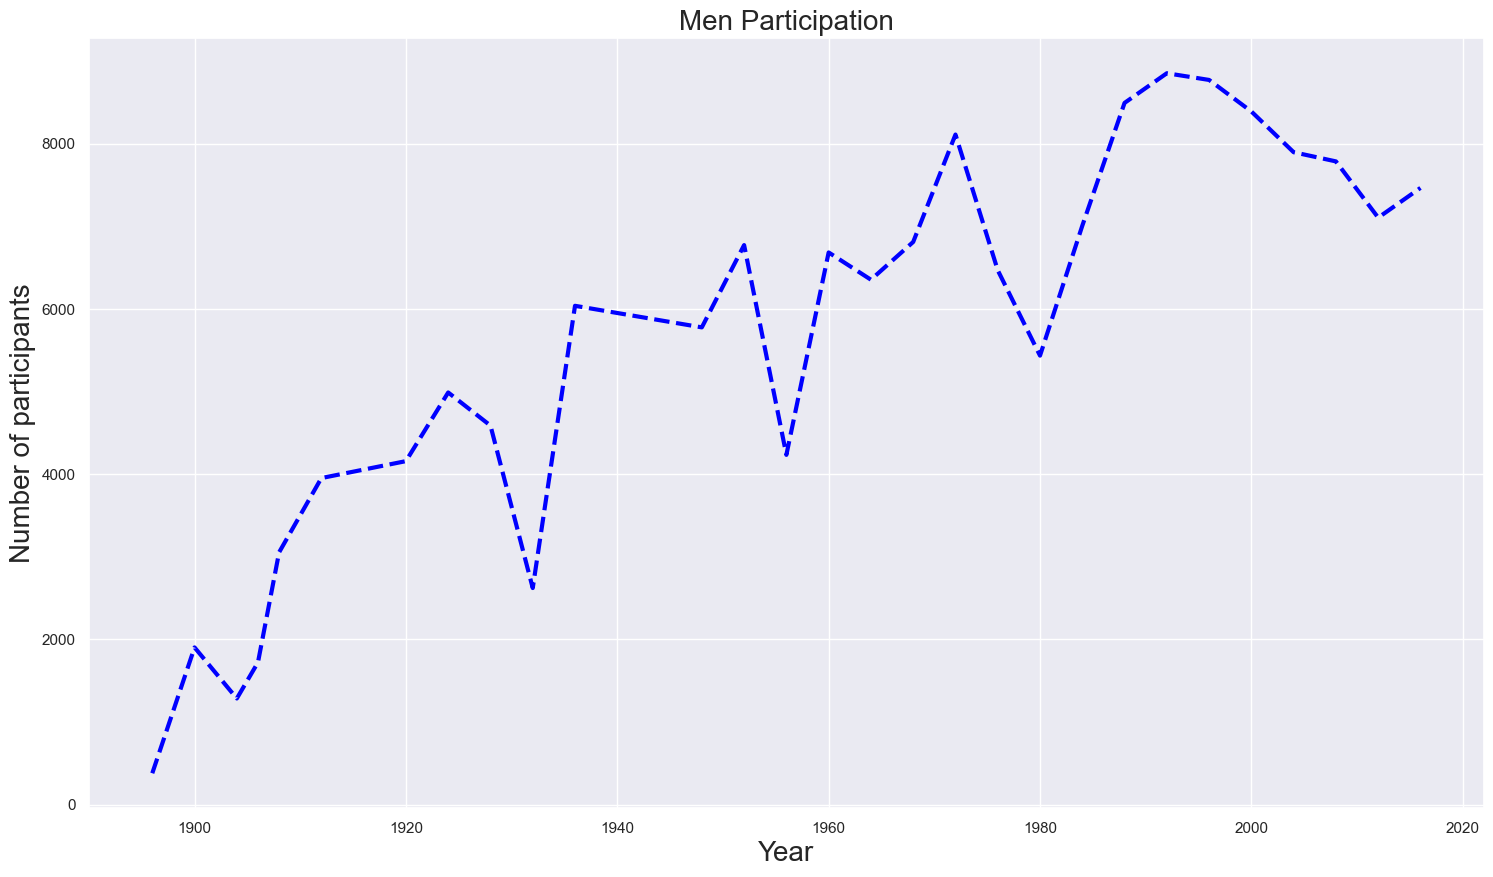

In [264]:
plt.figure(figsize=(18,10))
plt.plot(male_participants.index,male_participants,c='bLUE',linewidth=3, linestyle = 'dashed')
plt.title('Men Participation',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of participants",fontsize=20)
plt.show()

In [114]:
# Gold medalist

goldMedals=athletes_df[athletes_df.Medal=="Gold"]
goldMedals.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN
271076,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia,NaN


In [116]:
# gold medalist beyond 60 years
goldMedals['ID'][goldMedals['Age']>60].count()

6

In [124]:
# sports those 6 players played

event= goldMedals['Sport'][goldMedals['Age']>60]
event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

In [138]:
# Gold medals from top 10 countries

Top_10_gold=goldMedals.Region.value_counts().reset_index(name='Medals').head(10)
Top_10_gold

,Region,Medals
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


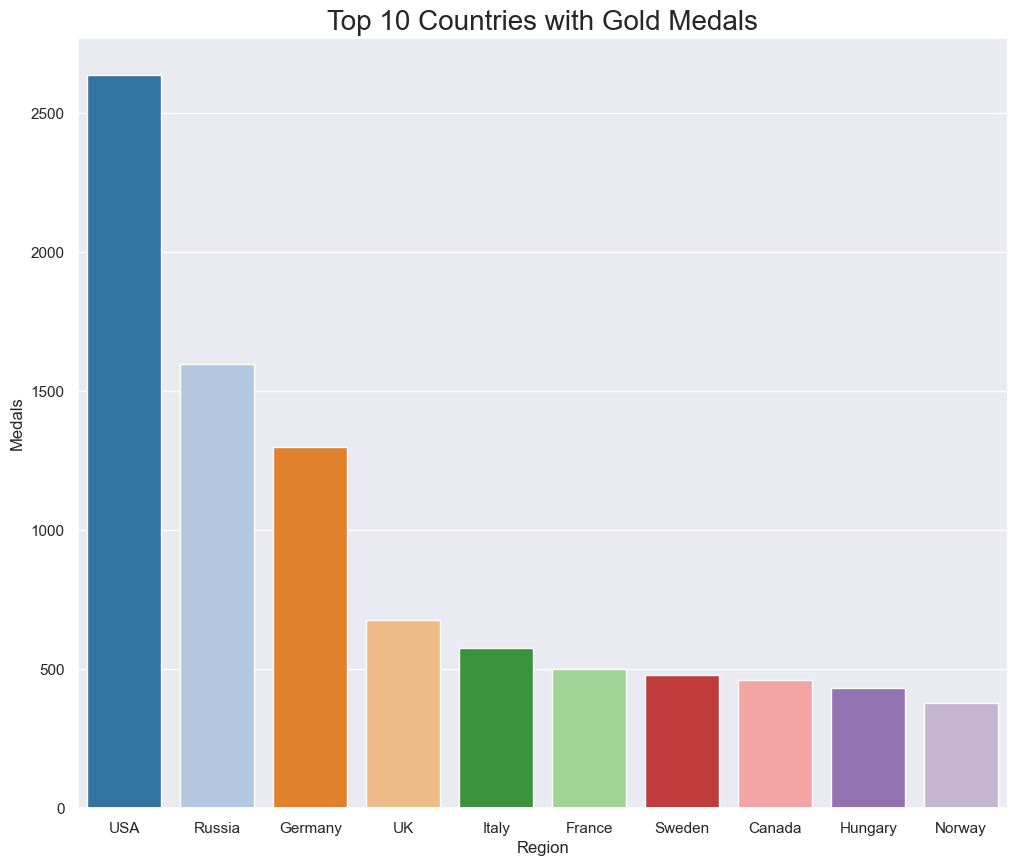

In [279]:
plt.figure(figsize=(12,10))

plt.title("Top 10 Countries with Gold Medals", fontsize=20)
sns.barplot (x=Top_10_gold.Region ,hue=Top_10_gold.Region, y=Top_10_gold.Medals,palette='tab20')
plt.show()

In [256]:
# 2016 Rio Summer Olympics

team_names= athletes_df[(athletes_df.Year==2016) & (athletes_df.Medal=='Gold')].Team
team_names.value_counts().reset_index(name='Medals').head(10)

,Team,Medals
0,United States,137
1,Great Britain,64
2,Russia,50
3,Germany,47
4,China,44
5,Brazil,34
6,Australia,23
7,Argentina,21
8,France,20
9,Japan,17


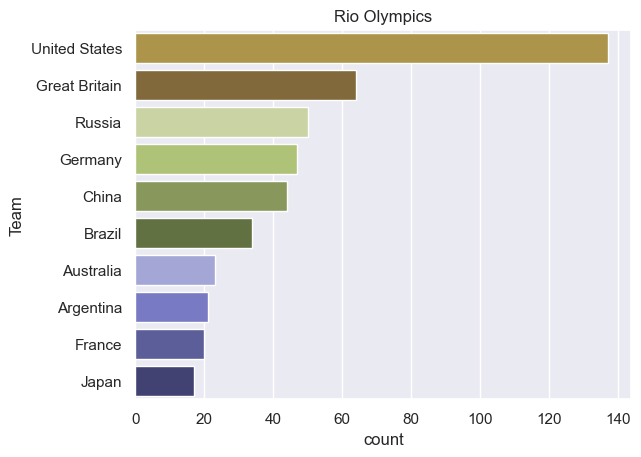

<Figure size 1200x600 with 0 Axes>

In [278]:
# Pie chart for the above data
plt.title("Rio Olympics")
sns.barplot(y=team_names.value_counts().head(10).index,x=team_names.value_counts().head(10),hue=team_names.value_counts().head(10),palette='tab20b',legend=False)
plt.figure(figsize=(12,6))


plt.show()

# Conclusion: 

# 1) Analyzed data from 1896 to 2016 Rio Olympics.
# 2) Checked null values.
# 3) Used query function to find the details of individual country.
# 4) Visualized "Top 10 countries participated" , "Age distribution" and found that 6 athletes age 60 years and beyond won gold medal.
# 5) Differentiated between the events of Summer and Winter Olympics, also between sex and found that 27.5% of total atheletes were female.
# 6) Women participation is increasing throughout the years , but for men the line and bar plot has up and downs.
# 7) USA won the highest gold medals of 2638 from year 1896 to 2016. 
# 8) USA also stood 1st in securing the maximum number of gold medals in the latest 2016 Rio Olympics.